# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [65]:
df.columns =map(lambda x: x.lower(), df.columns)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [66]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [67]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [68]:
df['num_lines'] = list(df['linename'].apply(lambda x: len(x)))
df.sort_values('num_lines', ascending = False).head(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
2676,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,04:00:00,REGULAR,2832359,3306438,12
2677,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,08:00:00,REGULAR,2832561,3306716,12
2678,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,09:57:08,REGULAR,2832815,3307705,12
2679,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,12:00:00,REGULAR,2832994,3308064,12
2680,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,16:00:00,REGULAR,2833390,3308536,12


## Write a function to clean a column name

In [69]:
def clean(col_name):
    cleaned = col_name.strip()
    cleaned = cleaned.lower()
    return cleaned

In [70]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [71]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [78]:
type(df['time'][0])

str

{'08/26/2018', '08/28/2018', '08/30/2018', '08/25/2018', '08/31/2018', '08/27/2018', '08/29/2018'}


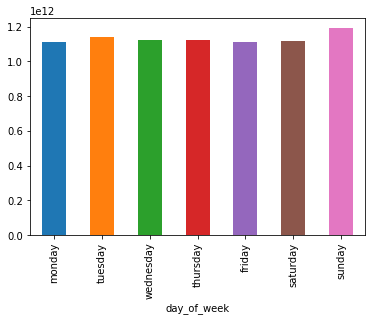

In [72]:
print(set(df['date']))
#Unfortnately our date info is in str form, so we need to look up what days of the week
#they were, fortunately there are only seven days of dates here
#8/25/2018 was a saturday
#couldn't get my lamdbda function working so I have this ugly function instead
def weekday(x):
    if x=='08/25/2018':
        return 'saturday'
    elif x=='08/26/2018':
        return 'sunday'
    elif x == '08/27/2018':
        return 'monday'
    elif x == '08/28/2018':
        return 'tuesday'
    elif x == '08/29/2018':
        return 'wednesday'
    elif x == '08/30/2018':
        return 'thursday'
    elif x == '08/31/2018':
        return 'friday'

#before I apply this, I think I need to sort on the date
df = df.sort_values('date', ascending = True)
df['day_of_week'] = [weekday(x) for x in df['date']]

grouped = df.groupby('day_of_week').sum()['entries']
grouped.head()
#now we have the number of entries by day hopefully
group_df = grouped.to_frame()
group_df


#they're must be a simpler way to properly order the columns....
weekdays = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
df_grouped = df.groupby('day_of_week').sum()
df_grouped = df_grouped.loc[weekdays]
df_grouped['entries'].plot(kind = 'bar')

#I need a better sense of the ways to adjust the plot... don't know why every bar
#is suddenly a different color
# would like to adjust the scale

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

1192306179082
1115661545514


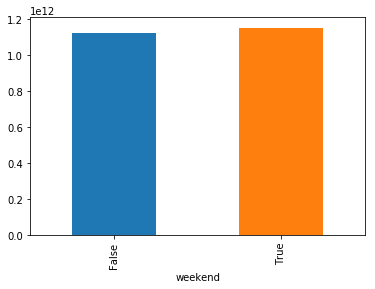

In [81]:
print(df_grouped.loc['sunday','entries'])
print(df_grouped.loc['saturday','entries'])
#create a new flag saying whether a day is in the weekend or weekday, to be grouped on later
df_grouped['weekend'] = list(map(lambda x: True if x == 'saturday' or x=='sunday'else False, df_grouped.index))
df_weekend = df_grouped.groupby('weekend').mean()
df_weekend['entries'].plot(kind='bar')

## Drop a couple of columns

In [74]:
df_grouped = df_grouped.drop('exits', axis = 1)
df_grouped

,entries,num_lines,weekend
day_of_week,,,
monday,1114237052454,76110,False
tuesday,1143313287046,77303,False
wednesday,1123655222441,75713,False
thursday,1122723988662,76607,False
friday,1110224700078,75573,False
saturday,1115661545514,74725,True
sunday,1192306179082,75306,True


## Summary

Great! You practiced your data cleanup-skills using Pandas.